<a href="https://colab.research.google.com/github/YolandaNkalashe25/COS801/blob/main/COS_Assignment_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install torch torchvision
import torch
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split


In [2]:
!pip install keras
!pip install tensorflow

In [3]:
import numpy as np
from torch import nn, optim
import torch.nn.functional as F
import seaborn as sns
from matplotlib import pyplot


In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Downloading data.
xy=pd.read_csv('/content/drive/My Drive/Colab Notebooks/COS801/fashion-mnist_train.csv')
xy_Test=pd.read_csv('/content/drive/My Drive/Colab Notebooks/COS801/fashion-mnist_test.csv')

In [ ]:
col=xy.columns
Xtrain=xy[col[1:]]
Ytrain=xy[col[0]]

In [ ]:
pyplot.imshow(x_train[0].reshape((28,28)))

In [ ]:
col_test=xy_Test.columns
Xtest=xy_Test[col_test[1:]]
Ytest=xy_Test[col_test[0]]



In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
Xtrain = scaler.fit_transform(Xtrain)
Xtest= scaler.fit_transform(Xtest)

In [ ]:
#Xtrain=Xtrain.to_numpy()
Ytrain=Ytrain.to_numpy()
Ytest=Ytest.to_numpy()

In [5]:
#Keras model.

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [ ]:
def simpleNN():
  model=Sequential[(
      Dense(10, activation='softmax',input_dim=784)))
  
model_simple=simpleNN()

In [ ]:
from keras.optimizers import SGD
opt = SGD()
clf.compile(
  optimizer=opt,
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [ ]:
from keras.callbacks import LearningRateScheduler
lr_sched=LearningRateScheduler(lambda epoch: 1e4 * (0.75**np.floor(epoch/2)))

## Fashion MNIST DATA

In [ ]:
#Fit our model
from tensorflow.keras.utils import to_categorical
history= clf.fit(Xtrain,to_categorical(Ytrain),validation_split=0.20,batch_size=50,verbose=2,epochs=500)#callbacks=[lr_sched,early_stopping])

Epoch 1/500
960/960 - 1s - loss: 0.9766 - accuracy: 0.6944 - val_loss: 0.7288 - val_accuracy: 0.7653
Epoch 2/500
960/960 - 1s - loss: 0.6707 - accuracy: 0.7854 - val_loss: 0.6359 - val_accuracy: 0.7950
Epoch 3/500
960/960 - 1s - loss: 0.6056 - accuracy: 0.8027 - val_loss: 0.5925 - val_accuracy: 0.8074
Epoch 4/500
960/960 - 1s - loss: 0.5701 - accuracy: 0.8141 - val_loss: 0.5656 - val_accuracy: 0.8148
Epoch 5/500
960/960 - 1s - loss: 0.5473 - accuracy: 0.8197 - val_loss: 0.5473 - val_accuracy: 0.8226
Epoch 6/500
960/960 - 1s - loss: 0.5304 - accuracy: 0.8241 - val_loss: 0.5351 - val_accuracy: 0.8258
Epoch 7/500
960/960 - 1s - loss: 0.5176 - accuracy: 0.8279 - val_loss: 0.5273 - val_accuracy: 0.8252
Epoch 8/500
960/960 - 1s - loss: 0.5076 - accuracy: 0.8304 - val_loss: 0.5154 - val_accuracy: 0.8294
Epoch 9/500
960/960 - 1s - loss: 0.4987 - accuracy: 0.8326 - val_loss: 0.5087 - val_accuracy: 0.8308
Epoch 10/500
960/960 - 1s - loss: 0.4918 - accuracy: 0.8349 - val_loss: 0.5054 - val_accura

In [ ]:
#Introducting early stop.
from keras.callbacks import EarlyStopping
early_stopping=EarlyStopping(monitor='val_loss',patience=10)
history_es=clf.fit(Xtrain,to_categorical(Ytrain),validation_split=0.20,batch_size=50,verbose=2,epochs=500, callbacks=[early_stopping])

Epoch 1/500
960/960 - 1s - loss: 0.3559 - accuracy: 0.8767 - val_loss: 0.4299 - val_accuracy: 0.8539
Epoch 2/500
960/960 - 1s - loss: 0.3558 - accuracy: 0.8767 - val_loss: 0.4316 - val_accuracy: 0.8536
Epoch 3/500
960/960 - 1s - loss: 0.3558 - accuracy: 0.8769 - val_loss: 0.4307 - val_accuracy: 0.8529
Epoch 4/500
960/960 - 1s - loss: 0.3559 - accuracy: 0.8770 - val_loss: 0.4324 - val_accuracy: 0.8532
Epoch 5/500
960/960 - 1s - loss: 0.3555 - accuracy: 0.8773 - val_loss: 0.4324 - val_accuracy: 0.8537
Epoch 6/500
960/960 - 1s - loss: 0.3558 - accuracy: 0.8766 - val_loss: 0.4301 - val_accuracy: 0.8529
Epoch 7/500
960/960 - 1s - loss: 0.3556 - accuracy: 0.8769 - val_loss: 0.4303 - val_accuracy: 0.8524
Epoch 8/500
960/960 - 1s - loss: 0.3559 - accuracy: 0.8770 - val_loss: 0.4301 - val_accuracy: 0.8534
Epoch 9/500
960/960 - 1s - loss: 0.3556 - accuracy: 0.8769 - val_loss: 0.4301 - val_accuracy: 0.8531
Epoch 10/500
960/960 - 1s - loss: 0.3557 - accuracy: 0.8775 - val_loss: 0.4314 - val_accura

In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

def plot_metric(history, metric):
  train_metrics=history.history[metric]
  val_metrics=history.history['val_'+metric]
  ephocs= range(1, len(train_metrics)+1)
  plt.plot(ephocs, train_metrics)
  plt.plot(ephocs, val_metrics)
  plt.title('Training and Validation'+ metric)
  plt.xlabel("Ephocs")
  plt.ylabel(metric)
  plt.legend(["train_"+metric, 'val_'+metric])
  plt.show()



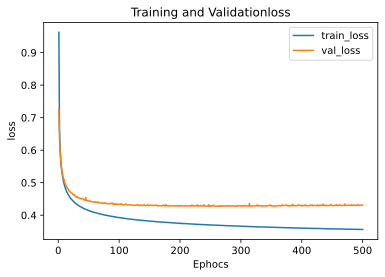

In [ ]:
plot_metric(history,'loss')

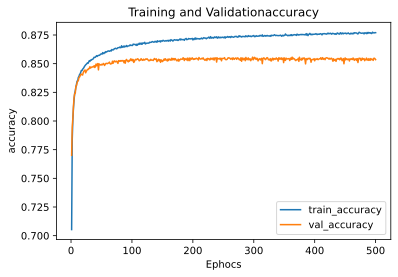

In [ ]:
#Plot for early stopping

plot_metric(history,'accuracy')

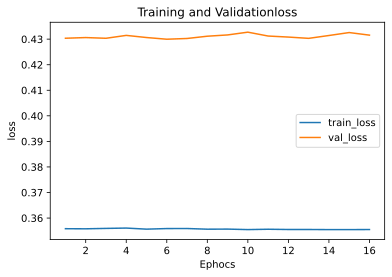

In [ ]:
plot_metric(history_es,'loss')

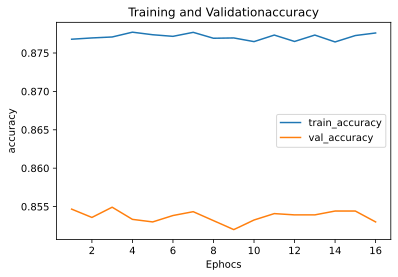

In [ ]:
plot_metric(history_es,'accuracy')

In [ ]:
_, train_acc = clf.evaluate(Xtrain, to_categorical(Ytrain), verbose=0)
_, test_acc = clf.evaluate(Xtest, to_categorical(Ytest), verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))

Train: 0.873, Test: 0.854


## MNIST handwritten digits data Training

In [ ]:
#Loading data from MIST library
!pip install mnist
import mnist

train_images = mnist.train_images()
train_labels = mnist.train_labels()
test_images = mnist.test_images()
test_labels = mnist.test_labels()

# Normalize the images.
train_images = (train_images / 255) - 0.5
test_images = (test_images / 255) - 0.5

# Flatten the images.
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

##Simple 
#history_mnist= clf.fit(train_images,to_categorical(train_labels),validation_split=0.20,batch_size=50,verbose=2,epochs=500)#callbacks=[lr_sched,early_stopping])

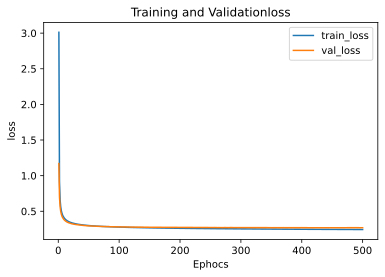

In [ ]:
plot_metric(history_mnist,'loss')

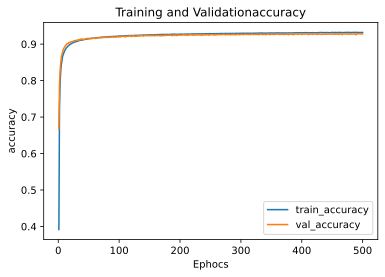

In [ ]:
plot_metric(history_mnist,'accuracy')

In [ ]:
history_MNIST_es=clf.fit(train_images,to_categorical(train_labels),validation_split=0.20,batch_size=50,verbose=2,epochs=500, callbacks=[early_stopping])

Epoch 1/500
960/960 - 1s - loss: 0.2434 - accuracy: 0.9323 - val_loss: 0.2690 - val_accuracy: 0.9277
Epoch 2/500
960/960 - 1s - loss: 0.2434 - accuracy: 0.9319 - val_loss: 0.2693 - val_accuracy: 0.9277
Epoch 3/500
960/960 - 1s - loss: 0.2433 - accuracy: 0.9323 - val_loss: 0.2690 - val_accuracy: 0.9284
Epoch 4/500
960/960 - 1s - loss: 0.2432 - accuracy: 0.9321 - val_loss: 0.2699 - val_accuracy: 0.9264
Epoch 5/500
960/960 - 1s - loss: 0.2432 - accuracy: 0.9324 - val_loss: 0.2692 - val_accuracy: 0.9282
Epoch 6/500
960/960 - 1s - loss: 0.2433 - accuracy: 0.9325 - val_loss: 0.2699 - val_accuracy: 0.9276
Epoch 7/500
960/960 - 1s - loss: 0.2432 - accuracy: 0.9320 - val_loss: 0.2698 - val_accuracy: 0.9276
Epoch 8/500
960/960 - 1s - loss: 0.2431 - accuracy: 0.9326 - val_loss: 0.2693 - val_accuracy: 0.9277
Epoch 9/500
960/960 - 1s - loss: 0.2431 - accuracy: 0.9324 - val_loss: 0.2695 - val_accuracy: 0.9274
Epoch 10/500
960/960 - 1s - loss: 0.2431 - accuracy: 0.9324 - val_loss: 0.2688 - val_accura

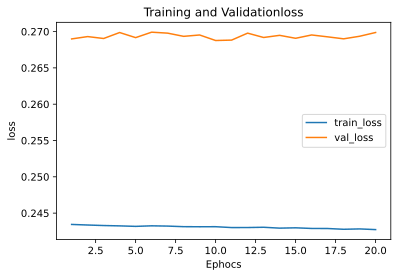

In [ ]:
plot_metric(history_MNIST_es,'loss')

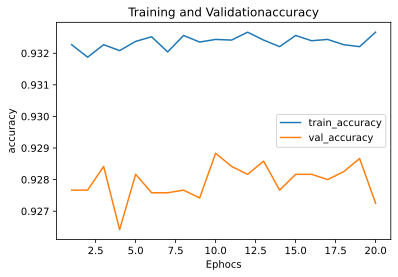

In [ ]:
plot_metric(history_MNIST_es,'accuracy')

In [ ]:
#Testing
_, train_acc_MNIST = clf.evaluate(train_images, to_categorical(train_labels), verbose=0)
_, test_acc_MNIST = clf.evaluate(test_images, to_categorical(test_labels), verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc_MNIST, test_acc_MNIST))

Train: 0.931, Test: 0.925


In [ ]:
#Predictions:
predictions = clf.predict(test_images)


In [ ]:
predictions

array([[1.78851838e-06, 1.41878991e-11, 1.86541706e-06, ...,
        9.94992673e-01, 6.81775327e-06, 2.68988195e-04],
       [1.06529077e-03, 1.56925234e-05, 9.87913549e-01, ...,
        8.12607278e-17, 3.38920712e-04, 2.13288566e-12],
       [7.25655980e-07, 9.85231519e-01, 7.31563335e-03, ...,
        2.18922365e-03, 2.32396461e-03, 1.58737297e-04],
       ...,
       [9.68823066e-09, 7.09100911e-09, 4.22930952e-06, ...,
        6.96654548e-04, 1.10922428e-02, 1.48241259e-02],
       [4.89641181e-08, 1.33922003e-06, 2.13883212e-07, ...,
        1.15794265e-07, 6.32208679e-03, 8.83029657e-07],
       [2.28129988e-06, 8.83194939e-13, 2.81035718e-05, ...,
        5.59453317e-11, 1.24717516e-07, 3.06468156e-10]], dtype=float32)

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

## CIFAR 10 data

In [ ]:
from keras.datasets import cifar10

In [ ]:
(Xtrain_C10, Ytrain_C10), (Xtest_C10, Ytest_C10) = cifar10.load_data() 

170500096/170498071 [==============================] - 3s 0us/step


In [ ]:
Ytrain_C10 = to_categorical(Ytrain_C10, 10)
Ytest_C10 = to_categorical(Ytest_C10, 10)
Xtrain_C10 = Xtrain_C10.astype('float32')
Xtest_C10 = Xtest_C10.astype('float32')
Xtrain_C10  /= 255
Xtest_C10 /= 255

## CIFAR 100 data

TRAINING MODEL 2

In [ ]:
def create_model():
  model = Sequential([
  Dense(200, activation='relu', input_shape=(784,)),
  Dense(100, activation='relu'),
  Dense(50, activation='relu'),
  Dense(25, activation='relu'),
  Dense(10, activation='softmax'),
])
  return model

model=create_model()

In [ ]:
from keras.optimizers import SGD
opt = SGD()
model.compile(
  optimizer=opt,
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [ ]:
from tensorflow.keras.utils import to_categorical
history_model2_fs=model.fit(Xtrain,to_categorical(Ytrain),validation_split=0.20,batch_size=50,verbose=2,epochs=500)# callbacks=[early_stopping])

Epoch 1/500
960/960 - 3s - loss: 0.1121 - accuracy: 0.9585 - val_loss: 0.4412 - val_accuracy: 0.8798
Epoch 2/500
960/960 - 3s - loss: 0.1125 - accuracy: 0.9594 - val_loss: 0.4264 - val_accuracy: 0.8846
Epoch 3/500
960/960 - 3s - loss: 0.1079 - accuracy: 0.9604 - val_loss: 0.3938 - val_accuracy: 0.8878
Epoch 4/500
960/960 - 3s - loss: 0.1035 - accuracy: 0.9621 - val_loss: 0.4042 - val_accuracy: 0.8886
Epoch 5/500
960/960 - 3s - loss: 0.1069 - accuracy: 0.9618 - val_loss: 0.3990 - val_accuracy: 0.8863
Epoch 6/500
960/960 - 3s - loss: 0.1070 - accuracy: 0.9611 - val_loss: 0.4746 - val_accuracy: 0.8692
Epoch 7/500
960/960 - 3s - loss: 0.1027 - accuracy: 0.9630 - val_loss: 0.4393 - val_accuracy: 0.8800
Epoch 8/500
960/960 - 3s - loss: 0.1009 - accuracy: 0.9642 - val_loss: 0.4703 - val_accuracy: 0.8760
Epoch 9/500
960/960 - 3s - loss: 0.0965 - accuracy: 0.9655 - val_loss: 0.4191 - val_accuracy: 0.8862
Epoch 10/500
960/960 - 3s - loss: 0.0942 - accuracy: 0.9663 - val_loss: 0.4339 - val_accura

In [ ]:
history_model2_fs_es=model.fit(Xtrain,to_categorical(Ytrain),validation_split=0.20,batch_size=50,verbose=2,epochs=500, callbacks=[early_stopping])

Epoch 1/500
960/960 - 3s - loss: 5.7448e-05 - accuracy: 1.0000 - val_loss: 1.1085 - val_accuracy: 0.8913
Epoch 2/500
960/960 - 3s - loss: 5.7334e-05 - accuracy: 1.0000 - val_loss: 1.1085 - val_accuracy: 0.8913
Epoch 3/500
960/960 - 3s - loss: 5.7199e-05 - accuracy: 1.0000 - val_loss: 1.1097 - val_accuracy: 0.8916
Epoch 4/500
960/960 - 3s - loss: 5.6988e-05 - accuracy: 1.0000 - val_loss: 1.1094 - val_accuracy: 0.8914
Epoch 5/500
960/960 - 3s - loss: 5.6854e-05 - accuracy: 1.0000 - val_loss: 1.1100 - val_accuracy: 0.8917
Epoch 6/500
960/960 - 3s - loss: 5.6736e-05 - accuracy: 1.0000 - val_loss: 1.1100 - val_accuracy: 0.8915
Epoch 7/500
960/960 - 3s - loss: 5.6589e-05 - accuracy: 1.0000 - val_loss: 1.1106 - val_accuracy: 0.8915
Epoch 8/500
960/960 - 3s - loss: 5.6373e-05 - accuracy: 1.0000 - val_loss: 1.1106 - val_accuracy: 0.8914
Epoch 9/500
960/960 - 3s - loss: 5.6244e-05 - accuracy: 1.0000 - val_loss: 1.1113 - val_accuracy: 0.8916
Epoch 10/500
960/960 - 3s - loss: 5.6175e-05 - accuracy

In [ ]:
_, train_acc_model2 = model.evaluate(Xtrain, to_categorical(Ytrain), verbose=0)
_, test_acc_model2 = model.evaluate(Xtest, to_categorical(Ytest), verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc_model2, test_acc_model2))

Train: 0.891, Test: 0.891


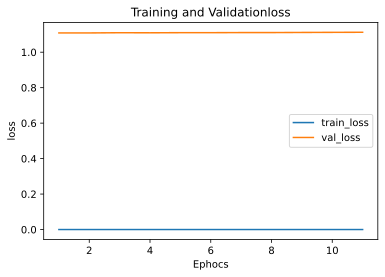

In [ ]:
plot_metric(history_model2_fs_es,'loss')

MNIST handwriting

In [ ]:
hist_model2=model.fit(train_images,to_categorical(train_labels),validation_split=0.20,batch_size=50,verbose=2,epochs=500)# callbacks=[early_stopping])

Epoch 1/500
960/960 - 3s - loss: 0.9989 - accuracy: 0.8095 - val_loss: 23.0576 - val_accuracy: 0.3988
Epoch 2/500
960/960 - 3s - loss: 0.2842 - accuracy: 0.9136 - val_loss: 23.7328 - val_accuracy: 0.3916
Epoch 3/500
960/960 - 3s - loss: 0.2180 - accuracy: 0.9341 - val_loss: 22.6822 - val_accuracy: 0.3972
Epoch 4/500
960/960 - 3s - loss: 0.1805 - accuracy: 0.9459 - val_loss: 22.5266 - val_accuracy: 0.4062
Epoch 5/500
960/960 - 3s - loss: 0.1553 - accuracy: 0.9534 - val_loss: 21.9780 - val_accuracy: 0.4114
Epoch 6/500
960/960 - 3s - loss: 0.1359 - accuracy: 0.9596 - val_loss: 22.0929 - val_accuracy: 0.4186
Epoch 7/500
960/960 - 3s - loss: 0.1223 - accuracy: 0.9637 - val_loss: 20.9829 - val_accuracy: 0.4211
Epoch 8/500
960/960 - 3s - loss: 0.1101 - accuracy: 0.9666 - val_loss: 21.2632 - val_accuracy: 0.4228
Epoch 9/500
960/960 - 3s - loss: 0.1023 - accuracy: 0.9691 - val_loss: 21.1798 - val_accuracy: 0.4221
Epoch 10/500
960/960 - 3s - loss: 0.0922 - accuracy: 0.9733 - val_loss: 21.8134 - 

In [ ]:
hist_model2_es=model.fit(Xtrain,to_categorical(Ytrain),validation_split=0.20,batch_size=50,verbose=2,epochs=500, callbacks=[early_stopping])

Epoch 1/500
960/960 - 3s - loss: 0.9158 - accuracy: 0.8295 - val_loss: 0.4454 - val_accuracy: 0.8528
Epoch 2/500
960/960 - 3s - loss: 0.3070 - accuracy: 0.8905 - val_loss: 0.4226 - val_accuracy: 0.8668
Epoch 3/500
960/960 - 3s - loss: 0.2542 - accuracy: 0.9081 - val_loss: 0.4229 - val_accuracy: 0.8683
Epoch 4/500
960/960 - 3s - loss: 0.2181 - accuracy: 0.9214 - val_loss: 0.4089 - val_accuracy: 0.8737
Epoch 5/500
960/960 - 3s - loss: 0.1918 - accuracy: 0.9299 - val_loss: 0.4137 - val_accuracy: 0.8779
Epoch 6/500
960/960 - 3s - loss: 0.1727 - accuracy: 0.9365 - val_loss: 0.4434 - val_accuracy: 0.8785
Epoch 7/500
960/960 - 4s - loss: 0.1545 - accuracy: 0.9435 - val_loss: 0.4813 - val_accuracy: 0.8704
Epoch 8/500
960/960 - 3s - loss: 0.1438 - accuracy: 0.9457 - val_loss: 0.4308 - val_accuracy: 0.8806
Epoch 9/500
960/960 - 3s - loss: 0.1301 - accuracy: 0.9526 - val_loss: 0.4686 - val_accuracy: 0.8803
Epoch 10/500
960/960 - 3s - loss: 0.1224 - accuracy: 0.9547 - val_loss: 0.4875 - val_accura

In [ ]:
_, train_acc_MNIST_model2 = model.evaluate(train_images, to_categorical(train_labels), verbose=0)
_, test_acc_MNIST_model2 = model.evaluate(test_images, to_categorical(test_labels), verbose=0)
print('Train: %.3f, Test: %.3f' % (train_acc_MNIST_model2, test_acc_MNIST_model2))

Train: 0.112, Test: 0.110


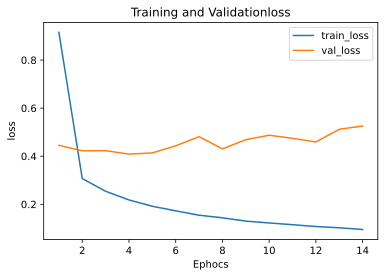

In [ ]:
plot_metric(hist_model2_es,'loss')

### Model 3- Auto Encoder (MNIST handwritten digits)

In [ ]:
import keras
from keras import layers

In [ ]:
encoding_dim = 392
input_img = keras.Input(shape=(784,))
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
decoded = layers.Dense(784, activation='sigmoid')(encoded)
#utput_layer = layers.Dense(X_input.shape[1], activation='relu')(decoded)

autoencoder = keras.Model(input_img, decoded)

In [ ]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

In [ ]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [ ]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_split=0.20)

Epoch 1/50
188/188 [==============================] - 6s 34ms/step - loss: 0.1819 - accuracy: 0.0120 - val_loss: 0.1091 - val_accuracy: 0.0109
Epoch 2/50
188/188 [==============================] - 6s 33ms/step - loss: 0.0945 - accuracy: 0.0128 - val_loss: 0.0851 - val_accuracy: 0.0123
Epoch 3/50
188/188 [==============================] - 6s 33ms/step - loss: 0.0795 - accuracy: 0.0132 - val_loss: 0.0765 - val_accuracy: 0.0122
Epoch 4/50
188/188 [==============================] - 6s 33ms/step - loss: 0.0737 - accuracy: 0.0134 - val_loss: 0.0727 - val_accuracy: 0.0137
Epoch 5/50
188/188 [==============================] - 6s 33ms/step - loss: 0.0708 - accuracy: 0.0144 - val_loss: 0.0705 - val_accuracy: 0.0153
Epoch 6/50
188/188 [==============================] - 6s 33ms/step - loss: 0.0692 - accuracy: 0.0140 - val_loss: 0.0692 - val_accuracy: 0.0148
Epoch 7/50
188/188 [==============================] - 6s 34ms/step - loss: 0.0681 - accuracy: 0.0145 - val_loss: 0.0683 - val_accuracy: 0.0148

In [ ]:
encoder = keras.Model(input_img, encoded)

In [ ]:
# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# Create the decoder model
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

In [ ]:
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

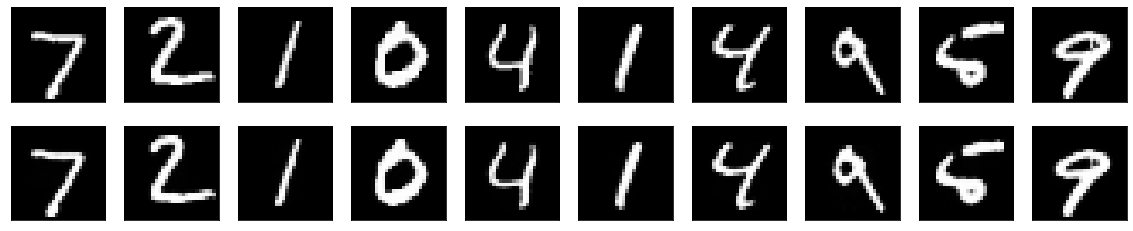

In [ ]:
import matplotlib.pyplot as plt

n = 10  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### Pre-trained Model

In [ ]:
hidden_representation = Sequential()
hidden_representation.add(autoencoder.layers[0])

In [ ]:
x_train_transformed = encoder.predict(train_images)
x_test_transformed = encoder.predict(test_images)

In [ ]:
x_train_transformed.shape

(60000, 392)

In [ ]:
model_ae = Sequential()
model_ae.add(Dense(200, activation='relu',input_shape=x_train_transformed.shape[1:]))
model_ae.add(Dense(100, activation='relu'))
model_ae.add(Dense(50, activation='relu'))
model_ae.add(Dense(25, activation='relu'))
model_ae.add(Dense(10, activation='softmax'))

In [ ]:
from keras.optimizers import SGD
opt = SGD()
model_ae.compile(
  optimizer=opt,
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [ ]:
train_labels=to_categorical(train_labels)

In [ ]:
train_labels.shape

(60000, 10)

In [ ]:
from tensorflow.keras.utils import to_categorical
history_model3=model_ae.fit(x_train_transformed,train_labels,validation_split=0.20,batch_size=50,verbose=2,epochs=500)# callbacks=[early_stopping])

Epoch 1/500
960/960 - 2s - loss: 1.3573 - accuracy: 0.5314 - val_loss: 0.8086 - val_accuracy: 0.7369
Epoch 2/500
960/960 - 2s - loss: 0.8144 - accuracy: 0.7229 - val_loss: 0.6294 - val_accuracy: 0.7791
Epoch 3/500
960/960 - 2s - loss: 0.6278 - accuracy: 0.7907 - val_loss: 0.5791 - val_accuracy: 0.8103
Epoch 4/500
960/960 - 2s - loss: 0.5289 - accuracy: 0.8280 - val_loss: 0.4010 - val_accuracy: 0.8715
Epoch 5/500
960/960 - 2s - loss: 0.4659 - accuracy: 0.8478 - val_loss: 0.6492 - val_accuracy: 0.7969
Epoch 6/500
960/960 - 2s - loss: 0.4152 - accuracy: 0.8638 - val_loss: 0.3505 - val_accuracy: 0.8792
Epoch 7/500
960/960 - 2s - loss: 0.3768 - accuracy: 0.8766 - val_loss: 0.3962 - val_accuracy: 0.8646
Epoch 8/500
960/960 - 2s - loss: 0.3614 - accuracy: 0.8833 - val_loss: 0.3543 - val_accuracy: 0.8723
Epoch 9/500
960/960 - 2s - loss: 0.3313 - accuracy: 0.8938 - val_loss: 0.3011 - val_accuracy: 0.9039
Epoch 10/500
960/960 - 2s - loss: 0.3152 - accuracy: 0.8971 - val_loss: 0.2910 - val_accura

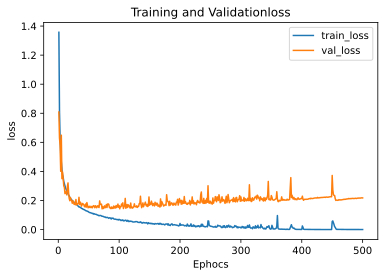

In [ ]:
plot_metric(history_model3,'loss')

In [ ]:
_, train_model3= model_ae.evaluate(x_train_transformed, train_labels, verbose=0)
_, test_model3 = model_ae.evaluate(x_test_transformed, to_categorical(test_labels), verbose=0)
print('Train: %.3f, Test: %.3f' % (train_model3, test_model3))

Train: 0.994, Test: 0.968


In [ ]:
predictions = model_ae.predict(x_test_transformed)

In [ ]:
np.argmax(predictions[0])

7

In [ ]:
np.argmax(test_labels[0])

0

### CNN CF10 Data

In [6]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [7]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [ ]:
train_images.shape

(50000, 32, 32, 3)

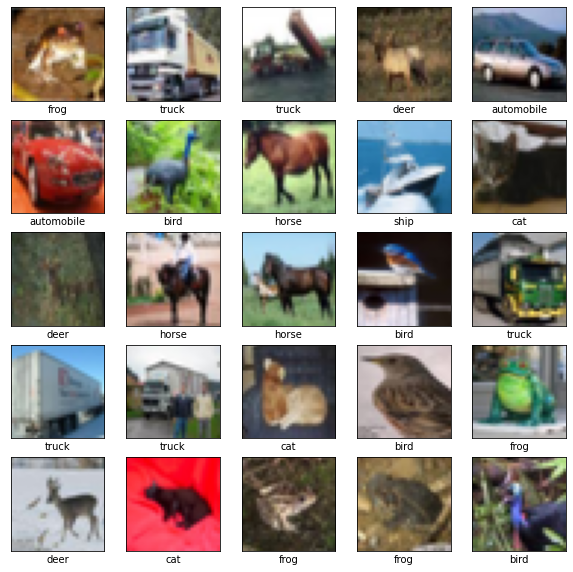

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()



In [8]:
model_cnn = models.Sequential()
model_cnn.add(layers.Conv2D(55, (3, 3), strides=(1,1),padding='same',kernel_initializer='he_normal',activation='relu', input_shape=(32, 32, 3)))
model_cnn.add(layers.MaxPooling2D((2, 2)))
model_cnn.add(layers.Conv2D(55, (3, 3),padding='same',activation='relu'))
model_cnn.add(layers.MaxPooling2D((2, 2)))
model_cnn.add(layers.Conv2D(55, (3, 3),padding='same',activation='relu'))
model_cnn.add(layers.MaxPooling2D((2, 2)))
model_cnn.add(layers.Flatten())
model_cnn.add(Dense(200, activation='relu'))
model_cnn.add(Dense(100, activation='relu'))
model_cnn.add(Dense(50, activation='relu'))
model_cnn.add(Dense(25, activation='relu'))
model_cnn.add(Dense(10, activation='softmax'))

In [9]:
from keras.optimizers import SGD
opt = SGD()
model_cnn.compile(optimizer=opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [10]:
from keras.optimizers import SGD
opt = SGD()
model_cnn.compile(
  optimizer=opt,
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [11]:
history_cnn = model_cnn.fit(train_images,to_categorical(train_labels), epochs=10, 
                    validation_split=0.20,batch_size=50,verbose=2)

Epoch 1/10
800/800 - 113s - loss: 2.0725 - accuracy: 0.2436 - val_loss: 1.8487 - val_accuracy: 0.3307
Epoch 2/10
800/800 - 112s - loss: 1.7175 - accuracy: 0.3793 - val_loss: 1.6922 - val_accuracy: 0.3820
Epoch 3/10
800/800 - 114s - loss: 1.5181 - accuracy: 0.4506 - val_loss: 1.4519 - val_accuracy: 0.4722
Epoch 4/10
800/800 - 112s - loss: 1.3974 - accuracy: 0.4904 - val_loss: 1.3864 - val_accuracy: 0.5019
Epoch 5/10
800/800 - 113s - loss: 1.3057 - accuracy: 0.5263 - val_loss: 1.2892 - val_accuracy: 0.5357
Epoch 6/10
800/800 - 114s - loss: 1.2304 - accuracy: 0.5536 - val_loss: 1.2139 - val_accuracy: 0.5649
Epoch 7/10
800/800 - 113s - loss: 1.1625 - accuracy: 0.5812 - val_loss: 1.1789 - val_accuracy: 0.5825
Epoch 8/10
800/800 - 113s - loss: 1.1035 - accuracy: 0.6025 - val_loss: 1.1022 - val_accuracy: 0.6083
Epoch 9/10
800/800 - 113s - loss: 1.0423 - accuracy: 0.6251 - val_loss: 1.1064 - val_accuracy: 0.6062
Epoch 10/10
800/800 - 112s - loss: 0.9902 - accuracy: 0.6467 - val_loss: 1.0742 - 